# Guassian Naive Bayes

*The Calculated Collective: Leah Hoogstra, Presley Kimball, Malindi Whyte*


#### Introduction

In the coursework for DATA 2060, we discussed a Naive Bayes algorithm which classified data represented as binary categorical features. We extend this algorithm to classify data represented as continuous features. This algorithm is called a Gaussian Naive Bayes algorithm. We follow the outline presented in the course textbook Chapter 24.0 and 24.1 (Shalev-Shwartz and Ben-David, 2014).


#### Representation


To classify, we want to maximize $P[Y=y|\mathbf{X}=\mathbf{x}]$. Therefore we define our classifier and rewrite it using Bayes rule
and $$\text{h}_{\text{Bayes}}(x) = \underset{y}{\arg\max} \; P[Y=y|\mathbf{X}=\mathbf{x}] = \underset{y}{\arg\max} \; \frac{P[Y = y] P[\mathbf{X} = \mathbf{x} | Y = y]}{P[\mathbf{X}=\mathbf{x}]}.$$

Since $P[X = x]$ is constant for each class, this is equivalent to
$$ \begin{align}\text{h}_{\text{Bayes}}(x)& = \underset{y}{\arg\max} \; P[Y = y] P[\mathbf{X} = \mathbf{x} | Y = y].\end{align} $$

We make the "naive" assumption of Naive Bayes: we assume that conditioned on the label, the features are independent. Let $d$ be the number of features. We apply the "naive" assumption to have
$$P[\mathbf{X}=\mathbf{x}|Y=y]=\prod _{j=1}^d P[X_j=x_j|Y=y].$$
For Gaussian Naive Bayes, we assume that the features are continuous and normally distributed conditioned on each class, which implies that the features  take values in $\mathbb{R}$. Using these assumptions, the classifier learns distributions of the features conditioned on each class. In particular, these distributions are assumed to be normal, and thus, we can estimate the probability density functions for
$P[X_j=x_j | Y=y]$.

Let $\mu_{j,y}\in \mathbb{R}$ and $\sigma_{j,y}^2 \in \mathbb{R}$ be the mean and variance respectively for the distribution of feature $j$ when conditioned on class $y$. Note $X_j | y \sim N(\mu_{j,y},\sigma_{j,y}^2 )$ by the Gaussian assumption. Then
$$\begin{align*}P[\mathbf{X}=\mathbf{x}|Y=y]&= \prod _{j=1}^d P[X_j=x_j|Y=y] \quad \text{ by independence}\\
 &=\prod _{j=1}^d \frac{1}{\sqrt{2π}σ_{j,y}}e^{-\frac{1}{2}\frac{\left( x_j-\mu_{j,y}\right)^2}{σ_{j,y}^2}}\quad \text{ by the PDF of }X_j=x_j | Y=y\\
&= \text{exp}  \left(-\frac{1}{2} \sum _{j=1}^d \frac{\left( x_j-\mu^y _{j}\right)^2}{σ_j^2} \right)\left( \prod _{j=1}^d \frac{1}{\sqrt{2π}σ_j} \right)  \end{align*}$$
where the last step is given by products of exponentials.
Considering all features at once, let $\mu_y = (\mu_{1,y},\mu_{2,y},...,\mu_{d,y})$ be the mean vector for the features conditioned on label $y$.
Let $\Sigma_y$ be the covariance matrix of the features conditioned on label $y$. That is
$$\Sigma_y = \begin{pmatrix} σ_{1,y}^2& 0 & \cdots&\cdots &0\\
0& σ_{2,y}^2 & 0&&\vdots\\
\vdots&\ddots&\ddots&\ddots&\vdots\\
\vdots&&0&σ_{d-1,y}^2&0\\
0 &\cdots&\cdots&0&σ_{d,y}^2\end{pmatrix}$$
Note that since we are assuming indepencence of the features given the label, the covariance matrix of the features is simply a diagonal matrix with $\Sigma_{(j,j), y}=\sigma_{j, y}^2$. Under this form, we have $\text{det} \Sigma_y=\prod _{j=1}^d σ_{j,y}^2$ and that the inverse of the covariance matrix, $\Sigma_y^{-1}$, is a diagonal matrix with $\Sigma_{(j,j), y}= (\sigma_{j,y}^2)^{-1}$. Now we can rewrite the above expression as

$$P[\mathbf{X}=\mathbf{x}|Y=y] =  \frac{1}{\left( {2π} \right)^{\frac{d}{2}}\left( \text{det} \Sigma_y \right)^{\frac{1}{2}}} \; \text{exp}  \left(-\frac{1}{2} \left( x-\mu_y \right)^{T} \Sigma_y^{-1}\left( x-\mu_y \right) \right). $$

Lastly, we set the prior distribution $P[Y = y]$ to be the proportions of each class in the dataset. Thus, we calculate the prior distribution as
$$P[Y = y]= \frac{ \text{number of samples of class y}}{ \text{total number of samples}}$$

We then can compute all expressions of
$$ P[Y = y] P[\mathbf{X} = \mathbf{x} | Y = y]$$
for each class $y \in Y$ for given example $x \in X$. We then classify the example $x$ based on
$$\text{h}_{\text{Bayes}}(x) = \underset{y}{\arg\max} P[Y = y] P[\mathbf{X} = \mathbf{x} | Y = y]$$
so that the assigned label has the highest probability $P[Y=y| \mathbf{X} =\mathbf{x}]$.



#### Loss and Optimizer

Let $S$ denote the training data. First, consider a sample $S_y$ denoting the subset of our training data of contining examples of just class $y$ such that $S_y\subseteq S$. We consider the $m$ examples of $S_y$ such that  $S_y= (\mathbf{x}_1,...,\mathbf{x}_m)$ for i.i.d. $\mathbf{x}_i \in \mathbb{R}^d$
for all $i = 1:m$ where $d $ is the number of features as before. We assume that $S_y$ was sampled from some overarching probablity distribution $P_{\theta_y}$ and we can then define the likelihood of this sample as
$$l(S_y;\theta_y) = \prod_{i=1}^m P_{\theta_y}(\mathbf{x}_i).$$
Moreover, we can define the log-likelihood  as
$$L(S_y;\theta_y) = \log\left(\prod_{i=1}^m P_{\theta_y}(\mathbf{x}_i)\right)= \sum_{i=1}^m \log(P_{\theta_y}(\mathbf{x}_i)).$$
For each $\mathbf{x}_i$, recall that we are assuming that the $j$th feature is normally distributed with mean $\mu_{j,y}$ and variance $\sigma_{j,y}$. In other words, we assume that the $j$th entry of $\mathbf{x}_i$, denoted as $x_{i,j}$, is distributed as $x_{i,j} \sim N(\mu_{j,y},\sigma_{j,y})$ for all $j=1:d$.  Then the overarching probability density distribution $P_{\theta_y}$ is parameterized by $\theta_y = (\boldsymbol{\mu}_y,\boldsymbol{\sigma}_y)$ where $\boldsymbol{\mu_y} = (\mu_{1,y},...,\mu_{d,y})$ and $\boldsymbol{\sigma_y} = (\sigma_{1,y},...,\sigma_{d,y})$. Since we are assuming that the features are independent, note that
$$P_{\theta_y}(x_i) = \prod_{j=1}^d P_{\theta_{j,y} }(x_i)$$
where $P_{\theta_{j,y} }$ is the distribution of the $j$th feature conditioned on $y$. Then, the log-likelihood can be written as
$$L(S_y;\theta_y) = \sum_{j=1}^d \sum_{i=1}^m \log(P_{\theta_j}(\mathbf{x}_i))= \sum_{j=1}^d L(S_y;\theta_{j,y} ).$$
Note that maximizing $L(S_y;\theta_y)$ is equivalent to maximizing $L(S_y;\theta_{j,y} )$ for each $j =1:d$. Since we assumed each feature was normally distributed, we then have
$$P_{\theta_{j,y} }(x_{i,j}) = \frac{1}{\sigma_{j,y}\sqrt{2\pi}}e^{\frac{- ( x_{i,j}-\mu_{j,y} )^2 }{2 \sigma{j,y} ^2} }.$$
Hence
$$\begin{align*}
L(S_y;\theta_{j,y}) &= \sum_{i=1}^m\log\left(\frac{1}{\sigma_{j,y}\sqrt{2\pi}}e^{\frac{- ( x_{i,j}-\mu_{j,y} )^2 }{2 \sigma{j,y} ^2} }\right)\\
&= \sum_{i=1}^m\left(\frac{-(x_{i,j}-\mu_{j,y})^2}{2\sigma_{j,y}^2}+\log\left(\frac{1}{\sigma_{j,y}\sqrt{2\pi}}\right)\right)\\
&= -m\log(\sigma_{j,y}\sqrt{2\pi})-\frac{1}{2\sigma_{j,y}^2}\sum_{i=1}^m(x_{i,j}-\mu_{j,y})^2.
\end{align*}$$
We are trying to maximize the log-likelihood using $\mathbf{\mu}$ and $\mathbf{\sigma}$. Taking the derivative with respect to $\mu_{j,y}$, we have
$$\frac{d}{d\mu_{j,y}}L(S_y;\theta_{j,y}) = \frac{1}{\sigma_{j,y}^2}\sum_{i=1}^m(x_{i,j}-\mu_{j,y}).$$
Then, with respect ot $\sigma_{j,y}$, we have
$$\frac{d}{d\sigma_{j,y}}L(S_y;\theta_{j,y}) =-\frac{m}{\sigma_{j,y}}+\frac{1}{\sigma_{j,y}^3}\sum_{i=1}^m(x_{i,j}-\mu_{j,y})^2.$$
Setting these derivatives equal to zero and solving for the respective parameter, we get
$$\begin{align*}
\mu_{j,y}&= \frac{1}{m}\sum_{i=1}^m x_{i,j}\\
\sigma_{j,y} &=\sqrt{\frac{1}{m}\sum_{i=1}^m(x_{i,j}-\mu_{j,y})^2}.
\end{align*}$$
Therefore, to maximize the likelihood of obtaining a sample in class $y$, we calculate $\mu_{j,y}$ and $\sigma_{j,y}$ to be the empirical mean and variance for each feature $j = 1:d$ conditioned on class $y$ to generate an estimate of $P_{\theta_{j,y} }$ for each feature. This choice then maximizes the log-likelihood $L(S_y;\theta_{j,y})$.

We use the negative of the log-likelihood to determine the loss of a given example:
$$ \ell(\theta, \mathbf{x}) = - \log (P_\theta(\mathbf{x})).$$
Therefore, minimizing the total loss is equivalent to maximizing the log-likelihood:

$$ \underset{\theta}{\operatorname{argmin}} \sum_{i=1}^m \ell(\theta, \mathbf{x}_i) = \underset{\theta}{\operatorname{argmax}} \sum_{i=1}^m \log(P_\theta(\mathbf{x}_i))$$
where $m$ is now the number of total examples.
Note that we can rewrite this expression as
$$\begin{align*}\underset{\theta}{\operatorname{argmax}} \sum_{i=1}^m \log(P_\theta(\mathbf{x}_i))&=\sum_{y\in Y}\underset{\theta_y}{\operatorname{argmax}} \sum_{i=1}^m 1_{y_i=y} \log(P_{\theta_y}(\mathbf{x}_i))\\
&=\sum_{y\in Y}\underset{\theta_y}{\operatorname{argmax}} L(S_y;\theta_y)
\end{align*}$$
where the second equality comes frome the defintion of $L(S_y;\theta_y)$ and $S_y$. We have shown that we maximize $L(S_y;\theta_y)$ by letting $\theta_y = (\boldsymbol{\mu}_y,\boldsymbol{\sigma}_y)$ where $\boldsymbol{\mu_y} $ and $\boldsymbol{\sigma_y}$ were the vectors of empirical means and variances for each feature conditioned on class $y$.
 Hence we minimize loss the same choice of $\theta$.

#### Note on data preprocessing
Due to the nature of the normal distribution, we cannot assign a distribution to $P[X=x|Y=y]$ if there are no examples for class y since there would be unknown variance and mean. Therefore, we let $P[X=x|Y=y]= 0$ if there are no examples of class y in the training data.
Additionally, it is necessary to have an invertible covariance matrix to calculate our expression for $P[X=x|Y=y]$. The covariance matrix $\Sigma _y$ is not invertible if and only if one or more of the features $X_j|Y=y$ has a variance of zero. Thus, when a user inputs data where this is true we produce a data preprocessing error. Moreover, when comparing our results to sklearn, we turn off variance smoothing by setting there methods variance smoothing paramter to 0. We make this choice as using variance smoothing as sklearn does- making any 0 variance 1e-9 - introduces numerical instability when we divide by the determinant of the covariance.

#### The Algorithm
Using the theoretical we have given above, we proceed with our model below.

We create our class `GaussianNaiveBayes` where you initialize the object with the number of classes. You can then train the model using `train` which calculates the mean of each feature as well as the covariance matrix using `_get_params`. As described above, the model makes the naive assumption that assuming the features are independent. Therefore, the covariance matrix is the diagonal matrix with the feature variances on the diagonal and zeros elsewhere. We also calculate the label priors.

We then can make predictions on a given sample using `predict` which predicts using equation (1). The model also calculates accuracy using mean 0-1 loss.

Note that this model has several advantages and disadvantages. Gaussian Naive Bayes is a deterministic classifier that works well for classifying data containing continuous features, especially if the assumptions are met. The model is relatively easy to follow and follows a nice mathematical set up.

On the other hand, the model requires strong assumptions that are not met by most data sets. In particular, the model assumes that conditioned on the class, the features are normally distributed and independent, which is an assumption that is barely met in practice. Additionally, the model may struggle with small data sets where there may not be enough information in training for a certain class (as we discuss previously with the 0 variance or empty example case). Lastly, this model is in general very sensitive to the training data which is passed since the data is used to estimate prior distribution of the classes and the likelihood of observing an example given a class based on the empirical means and variances. If there is not a sufficient amount of data for a specific class given in training, then it is possible that the prior distribution will be skewed and result that no predictions result in that class.

However, when the model's assumptions are reasonably achieved a fair amount of training data is passed, Gaussian Naive Bayes provides a relatively good model for predicting discrete classes given continuous features.

#### Model

In [1]:
import numpy as np
import pandas as pd

class GaussianNaiveBayes(object):
    """ Gaussian Naive Bayes model
    @attrs:
        n_classes: the number of classes
        n_features: the number of features
        label_priors: a 1D NumPy array of the priors distribution
            (label_priors(i)=P(Y_i))
        means: a 2D array of size (n_classes,n_features) where Mu(i,j) is the
            mean of jth feature for the ith class
        covariance: a 3D array of size (n_classes,n_features,n_features)
            where covariance[i,:,:] = covariance of the features
            conditioned on the ith class
    """
    def __init__(self, n_classes):
        """ Initializes a NaiveBayes model with n_classes. """
        self.n_classes = n_classes
        # initialize parameters for storage in train
        self.n_features = None
        self.label_priors = None
        self.mean = None
        self.covariance = None

    def train(self, X_train, y_train):
        """ Trains the model, using maximum likelihood estimation.
        @params:
            X_train: a 2D (n_examples x n_attributes) numpy array
            y_train: a 1D (n_examples) numpy array
        @return:
            None
        """
        self.n_features = X_train.shape[1]
        # get means and covariances
        self._get_params(X_train, y_train)
        # compute prior dist of labels
        self.label_priors = np.zeros(self.n_classes)
        for i in range(self.n_classes):
          self.label_priors[i]= (sum(y_train==i))/(len(y_train))
        pass

    def _get_params(self, X, Y):
        """ Calculated mean and covariance for each class.
        @params:
            X: a 2D (n_examples x n_attributes) numpy array
            Y: a 1D (n_examples) numpy array
        @return:
            None
        """
        # create arrays for storage
        self.mean = np.zeros((self.n_classes, X.shape[1]))
        self.covariance = np.zeros((self.n_classes, X.shape[1], X.shape[1]))
        # compute mean and covariance for each class
        for i in range(self.n_classes):
            X_i = X[Y == i]
            # empty case: no samples for class i
            # stores mean and covariance as np.nan so that error is produced if
            # any future calculation tries to call these values
            if X_i.shape[0] == 0:
              self.mean[i, :] = np.nan
              self.covariance[i, :, :] = np.nan
              continue
            # non-empty case:
            self.mean[i, :] = np.mean(X_i, axis=0)
            #calculate variance and place on diagonal (0 on non-diagonal due to independence)
            var=np.zeros(self.n_features)
            for j in range(self.n_features):
              var[j]=np.var(X_i[:,j])
            if np.isin(0,var):
                print("Data preprocessing error: Feature has variance zero.")
                pass
            self.covariance[i, :, :] = np.diag(var)
        pass

    def predict(self, inputs):
        """ Outputs a predicted label for each input in inputs.
        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 1D numpy array of predictions
        """
        # loop over each example and predict class based on maximal probability
        labels = []
        for x in inputs:
          P_Y_X = []
          # calculate P(Y|X) for each class of the given example
          for i in range(self.n_classes):
            # empty case: If no examples of the class were given in training,
            # P(Y|X) = 0
            if (np.isnan(self.mean[i, :])).any() or (np.isnan(self.covariance[i, :, :])).any():
              P_Y_X.append(0)
            # non-empty case:
            else:
              # calculate P(X|Y)
              coeff = 1/((2*np.pi)**(self.n_features/2)*np.sqrt(np.linalg.det(self.covariance[i,:,:])))
              P_X_Y  = coeff*np.exp(-.5*np.matmul(np.matmul((x-self.mean[i,:]).T,
                                                            np.linalg.inv(self.covariance[i,:,:])),
                                                  (x-self.mean[i,:])))
              # calculate and store P(Y|X)
              P_Y_X.append(self.label_priors[i]*P_X_Y)
          # predicted class is argmax_{Y}(P(Y|X))
          labels.append(np.argmax(P_Y_X))
        return np.array(labels)


    def accuracy(self, X_test, y_test):
        """ Outputs the accuracy of the trained model on a given dataset.
        @params:
            X_test: a 2D numpy array of examples
            y_test: a 1D numpy array of labels
        @return:
            a float number indicating accuracy (between 0 and 1)
        """
        predictions = self.predict(X_test)
        return sum(predictions ==y_test)/len(y_test)



#### Check Model

In this first chunk, we include unit tests to make sure our model is performing properly. We include three test cases:
- **Case 1:** Large Samples Gaussian Distributions. In this test case, we sample two features from two distant Normal distributions $N(0,1)$ and $N(-20,1)$ of size 10,000 ($\times$ 2 features) and 20,000 ($\times$ 2 features). This case was mainly ensure that the mean and the covariance matrices of the data were being calculated correctly. Due to the law of large numbers, we expected the mean of each feature from each respective sample to be 0 and -20, respectively, with a variances of 1 (which is what we found). We also check that test data sampled from the same distribution as the training data is classified properly.  
- **Case 2:** All One Class. Here, we check that our model performs as we expect if all the inputed data is one class. We randomly generated 10 examples with 3 features and assigned them one class. We then tested to ensure that any new examples passed in testing were also classified as the same class.
- **Case 3:**  Linearly Separable Data Equally Distributed Between Classes. We chose 3 examples each for 3 classes such that the examples are linearly separable in 3 dimensions. In this case, we just wanted to ensure that all new examples from each classes respective region are also classified the same.

We also generated "true" test data labelings that don't align with what the model should predict so that we could evaluate the accuracy calculation.
After these unit tests, we include a discussion of the work we reproduced, as well as the output we use to compare our model to the previous work.

In [2]:
## TEST CASES ##
import pytest
np.random.seed(0)


test_model1=GaussianNaiveBayes(2) # Case 1
test_model2=GaussianNaiveBayes(3) # Case 2
test_model3=GaussianNaiveBayes(3) # Case 3

# Create Train and Test Data
# Case 1: Large Samples from Distant Gaussians
x_1_0=np.random.normal(0,1,(10000,2))
x_1_1=np.random.normal(-20,1,(20000,2))
y1_0 = np.zeros(10000)
y1_1 = np.ones(20000)
x1= np.concatenate((x_1_0,x_1_1))
y1= np.concatenate((y1_0,y1_1))
# test data
x_test1 = np.concatenate((np.random.normal(0,1,(3,2)),np.random.normal(-20,1,(2,2))))
y_test1 = np.concatenate((np.zeros(3),np.ones(2)))
y_test1_true = np.concatenate((np.zeros(1),np.ones(4)))

# Case 2: All One Class
x2 = np.random.uniform(0,1,(10,3))
y2 = np.ones(10)
# test data
x_test2 = np.random.uniform(0,1,(4,3))
y_test2 = np.ones(4)
y_test2_true = np.array([1, 0, 1, 0])

#Case 3: Linearly Separable Data Equally Distributed Between Classes
x3 = np.array([[ 2.15,1.06],
[ 2.37, 2.55],
[ 1.32, 1.24],
[-2.95, 1.85],
[-2.78, 2.4 ],
[-2.77, 1.88],
[ 0.94, -3.42],
[ 1.36 ,-2.97],
[ 1.29, -3.17]])

y3 = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
x_test3 = np.array([[ 1.68,  2.39],
 [ 1.45,  2.48],
 [ 1.51,  2.48],
 [-2.89,  2.09],
 [-3.26,  1.89],
 [-2.92,  2.34],
 [ 0.78, -2.76],
 [ 0.79, -3.21],
 [ 1.34, -2.71]])
# test data
y_test3 = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2]) #what the model should predict
y_test3_true = np.array([0, 0, 0, 1, 1, 1, 2, 2, 1]) #"true" labels of data- used to check accuracy

# Test train: Checks data types and shapes for all train objects
def check_train_dtype(model, x_train, y_train):
    assert isinstance(model.mean, np.ndarray)
    assert model.mean.ndim==2 and model.mean.shape==(model.n_classes, model.n_features)
    assert isinstance(model.covariance, np.ndarray)
    assert model.covariance.ndim==3 and model.covariance.shape==(model.n_classes,
                                                                 model.n_features, model.n_features)
    assert isinstance(model.label_priors, np.ndarray)
    assert model.label_priors.ndim==1 and model.label_priors.shape==(model.n_classes, )

# Manually calculates covariance for a given sample
def check_cov(x):
  var=np.zeros(x.shape[1])
  for j in range(x.shape[1]):
    var[j]=1/(x.shape[0])*np.sum((x[:,j]-np.mean(x[:,j]))**2)
  return np.diag(var)

# Case 1 tests
test_model1.train(x1,y1)
check_train_dtype(test_model1, x1, y1)
assert (test_model1.mean == pytest.approx(np.array([[0.0,0.0],[-20.0,-20.0]]), abs=0.05))
assert (test_model1.covariance == pytest.approx(np.array([np.eye(2),np.eye(2)]), abs= 0.05))
assert (test_model1.label_priors == pytest.approx(np.array([(10000)/(30000),
                                                            (20000)/(30000)]),abs=0.01))
assert (test_model1.predict(x_test1) == y_test1).all()
assert (test_model1.accuracy(x_test1,y_test1_true) ==  pytest.approx(3/5, 0.01))

# Case 2 tests
test_model2.train(x2,y2)
check_train_dtype(test_model2, x2, y2)
assert(np.isnan(test_model2.mean[0])).all()
assert(np.isnan(test_model2.mean[2])).all()
assert (test_model2.mean[1] == pytest.approx(np.array([np.mean(x2[:,0]),np.mean(x2[:,1]),
                                                       np.mean(x2[:,2])]), abs=0.01))
assert(np.isnan(test_model2.covariance[0])).all()
assert(np.isnan(test_model2.covariance[2])).all()
assert (test_model2.covariance[1] == pytest.approx(check_cov(x2[y2==1]), 0.01))
assert (test_model2.label_priors == pytest.approx(np.array([0, 1,0]), 0.01))
assert (test_model2.predict(x_test2) == y_test2).all()
assert (test_model2.accuracy(x_test2,y_test2_true) ==  pytest.approx(.5, 0.01))

# Case 3 tests
test_model3.train(x3,y3)
check_train_dtype(test_model3, x3, y3)
assert (test_model3.mean == pytest.approx(np.array([[(2.15+2.37+1.32)/3,(1.06+2.55+1.24)/3],
 [(-2.95-2.78-2.77)/3,(1.85+2.4+1.88)/3],[(0.94+1.36+1.29)/3,(-3.42-2.97-3.17)/3]]), 0.01))
assert (test_model3.covariance == pytest.approx(np.array([check_cov(x3[y3==0]),check_cov(x3[y3==1]),
                                                          check_cov(x3[y3==2])]), 0.01))
assert (test_model3.label_priors == pytest.approx(np.array([(3)/(9), (3)/(9), (3)/(9)]), 0.01))
assert (test_model3.predict(x_test3) == y_test3).all()
assert (test_model3.accuracy(x_test3,y_test3_true) ==  pytest.approx(8/9, 0.01))

We compare our models predictions with the prediction of the gaussian naive bayes model in sklearn (scikit-learn developers: Gaussian, 2024). Specifically, we compare the results of the model the wine classification data set from UC Irvine (Aeberhard and Forina ,1992;scikit-learn developers: load_wine, 2024). This dataset is composed of different Italians wines from three different "cultivars"- ie made from different vinyards with different grapes. The features are the amount of 13 different components/ingredients in the wines. Hence, based off of these 13 continuous features we classify the wines as from one of the three cultivars.
The data is made up of 59, 71, and 48 samples from each cultivar- 178 samples in total.

Within the next cell, we include a base run of our model and compute the accuracy of our model and sklearn's model. We also compare the predictions to see if we have any differences. Lastly, we produce a plot showing how our model's prediction of the feature distributions compares to the actual feature distributions as well as how the distributions compare across classes.

Our accuracy: 0.9622641509433962
Sklearn accuracy: 0.9622641509433962
There are 0 samples classified differently


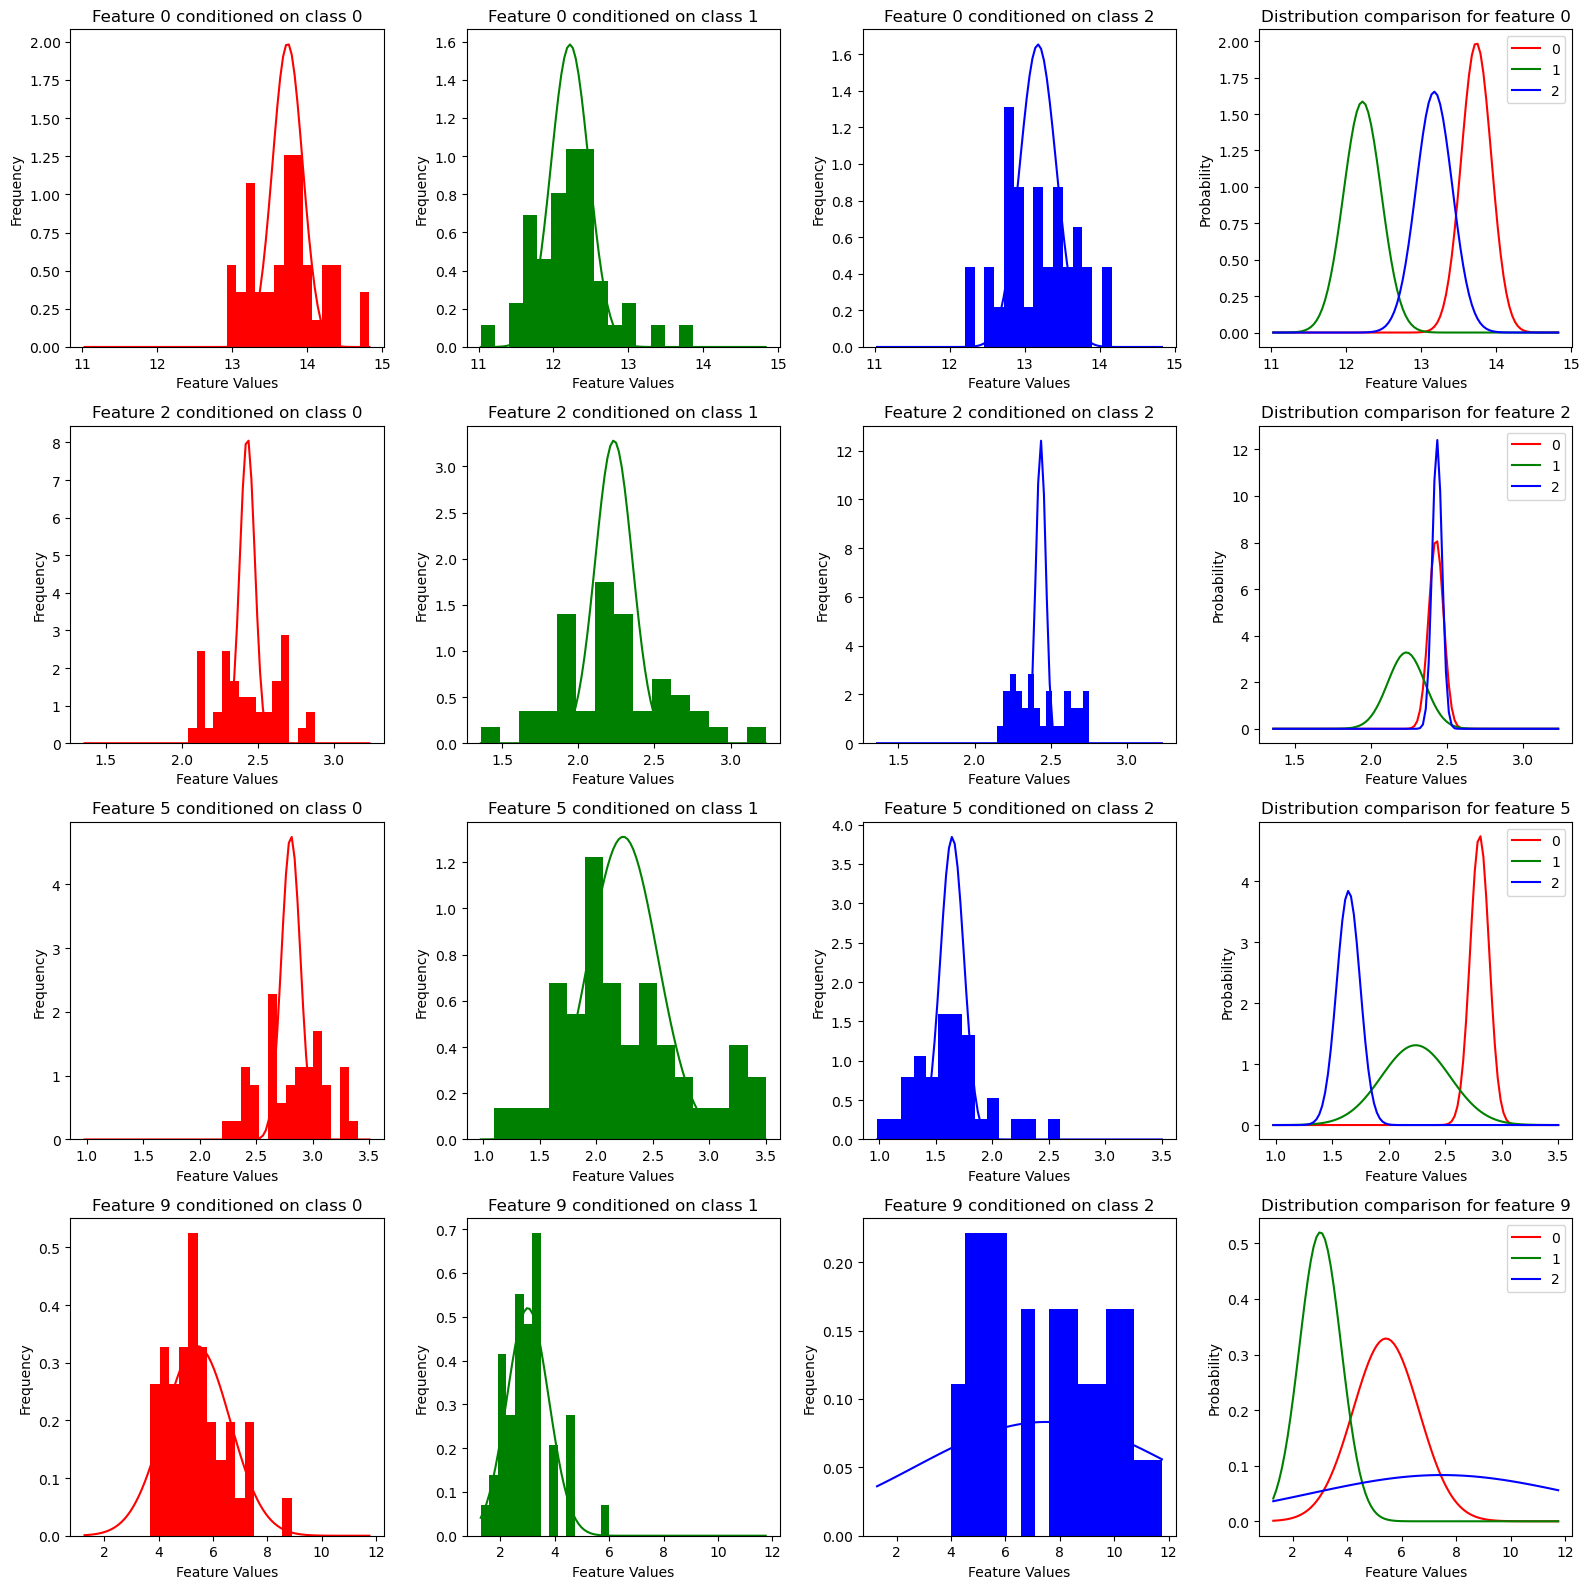

In [3]:
## Basic model comparing our run to sklearn
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
import random
import matplotlib.pyplot as plt
from matplotlib import ticker

# set seed
np.random.seed(0)
random.seed(0)
data = load_wine()
X = data.data
Y = data.target

# get training and testing data
indices = list(range(X.shape[0]))
random.shuffle(indices)

# 70% train and 30% test
train_index = int(np.ceil(X.shape[0]*0.7))

X_train = X[indices[:train_index]]
Y_train = Y[indices[:train_index]]
X_test = X[indices[train_index:X.shape[0]]]
Y_test = Y[indices[train_index:X.shape[0]]]

# train our model
our_wine_model = GaussianNaiveBayes(3)
our_wine_model.train(X_train,Y_train)
our_predictions = our_wine_model.predict(X_test)

sk_wine_model = GaussianNB(var_smoothing=0)
sk_wine_model.class_count_ = 3
sk_wine_model.fit(X_train, Y_train)
sk_predictions = sk_wine_model.predict(X_test)

diff = (our_predictions!=sk_predictions)

print(f"Our accuracy: {our_wine_model.accuracy(X_test, Y_test)}")
print(f"Sklearn accuracy: {sk_wine_model.score(X_test,Y_test)}")
print(f"There are {np.sum(diff)} samples classified differently")

# Create plot comparing our model's feature distributions to the actual
# feature distributions in the data
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()
plot_index = 0
colors = ['red', 'green', 'blue']

for i in [0,2,5,9]:
    start = min(X_train[:,i])
    end = max(X_train[:,i])
    x = np.linspace(start, end, 100)
    for j in range(3):
      # Create histogram with 30 bins
        axes[plot_index].hist(X_train[Y_train == j,i], bins=15,density=True,color = colors[j])
        mu = our_wine_model.mean[j,i]
        sigma = our_wine_model.covariance[j,i,i]
        out = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
        axes[plot_index].plot(x,out,color = colors[j])
        axes[plot_index].set_title(f"Feature {i} conditioned on class {j}")
        axes[plot_index].set_xlabel("Feature Values")
        axes[plot_index].set_ylabel("Frequency")
        plot_index += 1
    for j in range(3):
        mu = our_wine_model.mean[j,i]
        sigma = our_wine_model.covariance[j,i,i]
        out = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
        axes[plot_index].plot(x,out, label = f"{j}",color = colors[j])
    axes[plot_index].set_title(f"Distribution comparison for feature {i}")
    axes[plot_index].set_xlabel("Feature Values")
    axes[plot_index].set_ylabel("Probability")
    axes[plot_index].legend()
    plot_index += 1

plt.tight_layout()
plt.savefig('distribution comparison.png', dpi=300)
plt.show()

From this base run of a 70:30 training test split, we see that sklearn's and our model had an accuracy of 96.23%, and the models predicted the same exact labels. In the distributions, we see that some of the features conditioned on the classes closely follow the predicted normal distribution, but in others, the assumption falls very short. On the other hand, we are also able to see that the distributions of the features do vary across the classes as shown by the far right column.

We then check the correlation between each feature conditioned on class to explore the validity of the "naive" assumption that all features are indpendent.

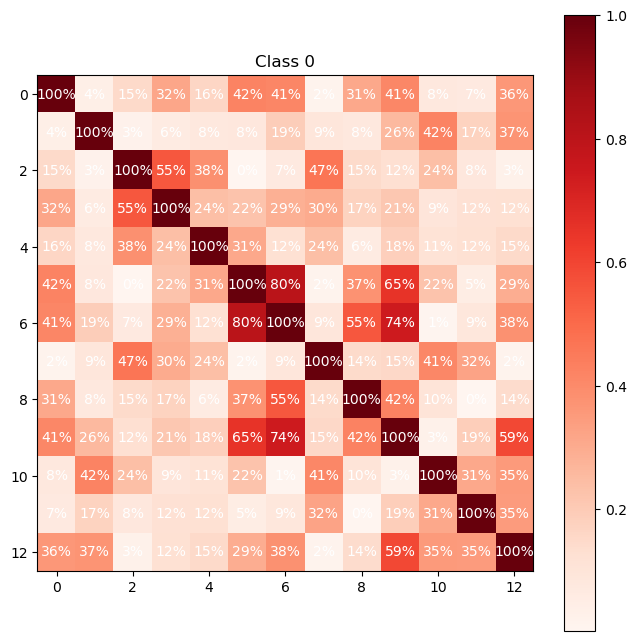

Text(0.5, 1.0, 'Class 2')

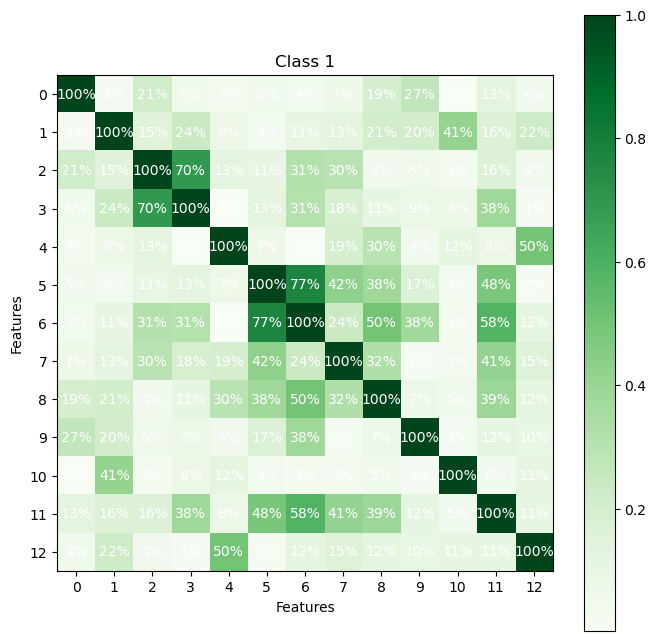

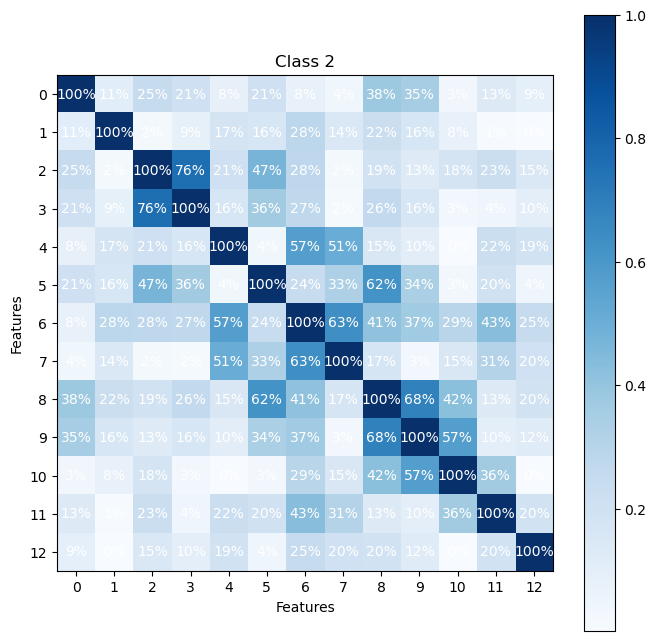

In [4]:
# correlation coefficients betweeen features - check how close/far we are from
# the naive assumption that the features are independent
cov_class0 = np.corrcoef(X[Y==0], rowvar = False)
cov_class1 = np.corrcoef(X[Y==1], rowvar = False)
cov_class2 = np.corrcoef(X[Y==2], rowvar = False)

# plot for class 0
fig, ax = plt.subplots(figsize = (8,8))
im = ax.imshow(np.abs(cov_class0), cmap = 'Reds')

# Loop over data dimensions and create text annotations.
for i in range(13):
    for j in range(13):
        text = ax.text(j, i, format(np.abs(cov_class0[i, j]), '.0%'),
                       ha="center", va="center", color="w")

plt.colorbar(im)
plt.title("Class 0")
plt.show()

# plot for class 1
fig, ax = plt.subplots(figsize = (8,8))
im = ax.imshow(np.abs(cov_class1), cmap = 'Greens')

# # Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))
ax.set_ylabel("Features")
ax.set_xlabel("Features")


# Loop over data dimensions and create text annotations.
for i in range(13):
    for j in range(13):
        text = ax.text(j, i, format(np.abs(cov_class1[i, j]), '.0%'),
                       ha="center", va="center", color="w")

plt.colorbar(im)
plt.title('Class 1')

# plot for class 2
fig, ax = plt.subplots(figsize = (8,8))
im = ax.imshow(np.abs(cov_class2), cmap = 'Blues')

# # Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))
ax.set_ylabel("Features")
ax.set_xlabel("Features")


# Loop over data dimensions and create text annotations.
for i in range(13):
    for j in range(13):
        text = ax.text(j, i, format(np.abs(cov_class2[i, j]), '.0%'),
                       ha="center", va="center", color="w")

plt.colorbar(im)
plt.title('Class 2')

We see that while many features do get close to the indpendence assumption, some depend strongly on others. Therefore, the naive assumption is relatively good for this data set, but our data does not match it perfectly.

Next, we examine how our model performs in comparison to sklearn's when as we vary the train and test split and as we use different random splits. We run 9 train/test splits 1000 times each to measure the spread of the accuracy.

In [5]:
# Test our accuracy and comparison with sklearn for training on different percentages of the data
train_pcts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
train_accuracy = []
accuracy = []
accuracy_sk = []
sklearn_diff = []
# run this 1000 times to get error bars
for p in range(len(train_pcts)):
  i=0
  while i < 1000:

    train_pct = train_pcts[p]

    # get training and testing data
    indices = list(range(X.shape[0]))
    random.shuffle(indices)

    # train_pct% train and remainder for test
    train_index = int(np.ceil(X.shape[0]*train_pct))

    X_train = X[indices[:train_index]]
    Y_train = Y[indices[:train_index]]
    X_test = X[indices[train_index:X.shape[0]]]
    Y_test = Y[indices[train_index:X.shape[0]]]

    # skips runs that have zero variances - this is an edge case that only happens in the low % train scenarios
    skip=0
    for y in range(3):
      x_y= X_train[Y_train == y]
      var=np.zeros(13)
      for j in range(13):
            var[j]=np.var(x_y[:,j])
      if np.isin(0,var):
        skip=1
        break
    if skip==1:
      continue
    else:
      # train our model
      our_wine_model = GaussianNaiveBayes(3)
      our_wine_model.train(X_train,Y_train)
      our_predictions = our_wine_model.predict(X_test)
      sk_wine_model = GaussianNB(var_smoothing=0)
      sk_wine_model.class_count_ = 3
      sk_wine_model.fit(X_train, Y_train)
      sk_predictions = sk_wine_model.predict(X_test)
      diff = (our_predictions!=sk_predictions)

      train_accuracy.append(our_wine_model.accuracy(X_train, Y_train))
      accuracy.append(our_wine_model.accuracy(X_test, Y_test))
      accuracy_sk.append(sk_wine_model.score(X_test, Y_test))
      sklearn_diff.append(np.sum(diff))
      i+=1

# reshape so row = run and column = train/test split percentage
train_accuracy = np.reshape(train_accuracy, (len(train_pcts), 1000)).T
test_accuracy = np.reshape(accuracy, (len(train_pcts), 1000)).T
accuracy_sk = np.reshape(accuracy_sk, (len(train_pcts), 1000)).T
sklearn_diff = np.reshape(sklearn_diff, (len(train_pcts), 1000)).T

c:\Users\leahh\anaconda3\envs\data2060\Lib\site-packages\numpy\_core\fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\leahh\anaconda3\envs\data2060\Lib\site-packages\numpy\_core\_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\leahh\anaconda3\envs\data2060\Lib\site-packages\numpy\_core\_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\leahh\anaconda3\envs\data2060\Lib\site-packages\numpy\_core\fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\leahh\anaconda3\envs\data2060\Lib\site-packages\numpy\_core\_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\leahh

(These warnings are produced by sklearn under the 10% training data case.)

Next we check accuracy.

In [8]:
# calculate mean, max/min, std of each measure
mn_diffs = np.mean(sklearn_diff)
mn_skacc =  np.mean(accuracy_sk, axis = 0)
mn_testacc = np.mean(test_accuracy, axis = 0)
mn_trainacc = np.mean(train_accuracy, axis = 0)

sum_diffs = sum(sklearn_diff)

# check how many runs we matched scikitlearn output EXACTLY
print(f"Number of Difference between our model and sklearn: {sum_diffs.sum()}")

Number of Difference between our model and sklearn: 0


We have an exact line-by-line match with sklearn's algorithm over all 9000 iterations of the algorithm!

Next we check the performance of the algorithm overall across all the runs.

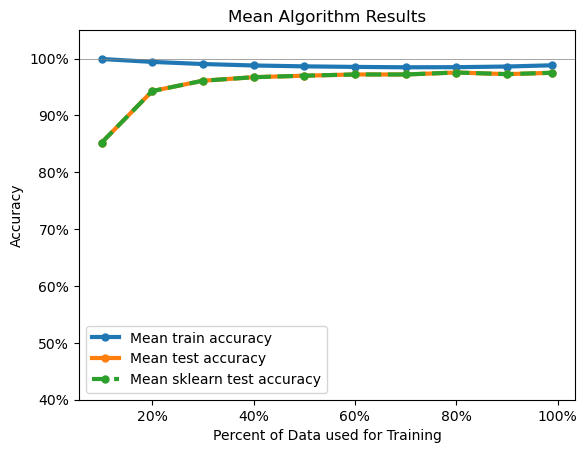

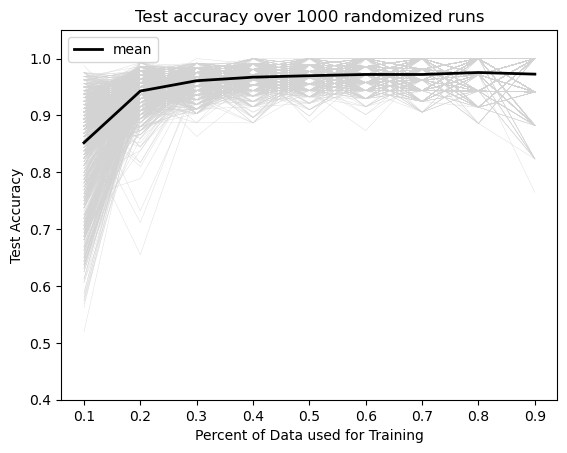

In [7]:
# plot the average train and test accuracy and sklearn's test accuracy
fig, ax = plt.subplots()
plt.plot(train_pcts, mn_trainacc, '.-', label = 'Mean train accuracy', linewidth = 3, markersize = 10)
plt.plot(train_pcts, mn_testacc, '.-', label = 'Mean test accuracy', linewidth = 3, markersize = 10)
plt.plot(train_pcts, mn_skacc, '.--', label = 'Mean sklearn test accuracy', linewidth = 3, markersize = 10)
plt.legend()
plt.ylim(0.4, 1.05)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))
ax.axhline(1, linestyle = '-', color = 'gray', linewidth = 0.5)
plt.title("Mean Algorithm Results")
plt.xlabel('Percent of Data used for Training')
plt.ylabel('Accuracy')
plt.show()

# see the range of test accuracies across runs - plot them all on the same plit
for i in range(len(test_accuracy)):
    plt.plot(train_pcts[0:9], test_accuracy[i, 0:9], '-', color = 'lightgray', linewidth = 0.25)

plt.plot(train_pcts[0:9], mn_testacc[0:9], '-', color = 'k', linewidth = 2, label = "mean")

plt.title('Test accuracy over 1000 randomized runs')
plt.xlabel('Percent of Data used for Training')
plt.ylabel('Test Accuracy')

plt.legend()
plt.ylim(0.4, 1.05)
plt.show()

We see that with higher percentages of the data used for training, the model does get more accurate. There is some risk of overfitting when using 90% or more of the data for training, but anywhere between 40% and 80% training data produced high test accuracy (over 97%). We again see that our test results faithfully reproduce sklearn's output.   

## References

Aeberhard, S. and Forina, M. (1992). *Wine: UC Irvine Machin Learning Repository* [Online, Dataset]. Available at https://archive.ics.uci.edu/dataset/109/wine (Accessed: 4 December 2024)

scikit-learn developers. (2024) *GaussianNB* [Online]. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html (Accessed: 4 December 2024)

scikit-learn developers. (2024) *load_wine* [Online]. Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html (Accessed: 4 December 2024)

Shalev-Shwartz, S., and Ben-David, S. (2014). *Understanding machine learning: From theory to algorithms.* 1st edn. New York: Cambridge university press.